In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats, arange

In [ ]:
def load_data() -> pd.DataFrame:

  df = pd.read_excel('d1.xlsx')
  df.columns = ['Date', 'NOx']
  df = df.dropna(subset=['NOx'])

  return df

In [ ]:
data = load_data()
data = data[data.Date < '20151231']
data = data.drop(["Date"], axis=1)

# **密度曲线**

In [ ]:
u = data.mean() 
std = float(data.std())
stats.kstest(data, 'norm', (u, std))
print('Mean：%.3f，Std：%.3f' % (u, std))

Mean：81.753，Std：84.531


<Figure size 720x432 with 0 Axes>

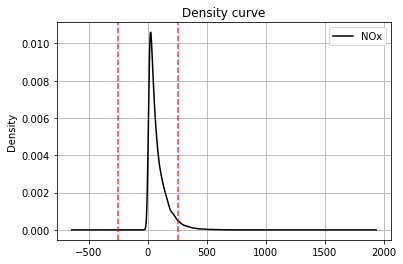

In [ ]:
fig = plt.figure(figsize = (10,6))
data.plot(kind = 'kde',grid = True,style = '-k',title = 'Density curve')
plt.axvline(3*std,color='r',linestyle="--",alpha=0.8) 
plt.axvline(-3*std,color='r',linestyle="--",alpha=0.8) 

The number of outliers: 34176


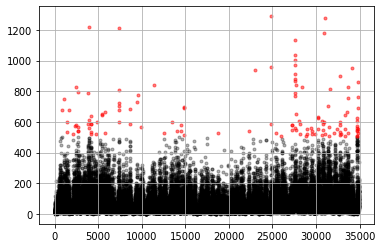

In [ ]:
error = data[np.abs(data - u) > 5*std]
data_c = data[np.abs(data - u) <= 5*std]
print('The number of outliers: %i' % len(error))
ax1 = fig.add_subplot(3,1,1)
plt.scatter(data_c.index,data_c,color = 'k',marker='.',alpha = 0.3)
plt.scatter(error.index,error,color = 'r',marker='.',alpha = 0.5)
plt.grid()

# **箱型图**

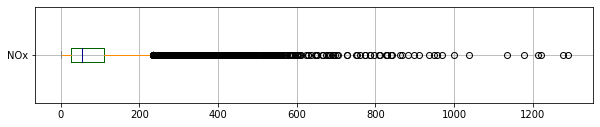

In [ ]:
fig = plt.figure(figsize = (10,6))
ax2 = fig.add_subplot(3,1,2)
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
data.plot.box(vert=False, grid = True,color = color,ax = ax2,label = 'NOx data')

In [ ]:
s = data.describe()
print(s)
print('------')
# 基本统计量

q1 = s['NOx'][4]
q3 = s['NOx'][6]
iqr = q3 - q1
min = q1 - 1.5*iqr
max = q3 + 1.5*iqr
print('IQR：%.3f，min：%.3f，max：%.3f' % (iqr,min,max))

                NOx
count  34176.000000
mean      81.752828
std       84.530618
min        0.254531
25%       25.874375
50%       54.322800
75%      109.871750
max     1289.150000
------
IQR：83.997，min：-100.122，max：235.868


The number of outliers: 34176


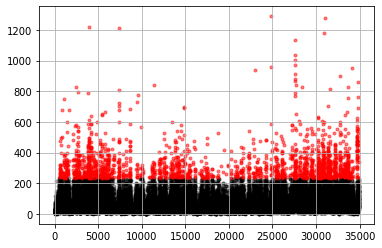

In [ ]:
ax2 = fig.add_subplot(3,1,3)
error = data[(data < min) | (data > max)]
data_c = data[(data >= min) & (data <= max)]
print('The number of outliers: %i' % len(error)) 

plt.scatter(data_c.index,data_c,color = 'k',marker='.',alpha = 0.3)
plt.scatter(error.index,error,color = 'r',marker='.',alpha = 0.5)
plt.grid()